In [152]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as ny
import pandas as ps
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import tree


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [153]:
def performance_evaluation(tp, tn, fp, fn, beta=1.0):

   accuracy = (tp + tn) / (tp + fp + fn + tn)
   sensitivity = tp / (tp + fn)
   specificity = tn / (fp + tn)
   precision = tp / (tp + fp)
   recall = sensitivity
   f_score = ( (beta**2 + 1) * precision * recall) / (beta**2 * precision + recall)
   auc = (sensitivity + specificity) / 2
   youden = sensitivity - (1 - specificity)
   p_plus = sensitivity / (1 - specificity)
   p_minus = (1 - sensitivity) / specificity
   dp = (ny.sqrt(3) / ny.pi) * (ny.log(sensitivity/(1 - sensitivity) + ny.log(specificity/(1 - specificity))))

   result = {}
   result["tp"] = tp
   result["tn"] = tn
   result["fp"] = fp
   result["fn"] = fn
   result["accuracy"] = accuracy
   result["sensitivity"] = sensitivity
   result["specificity"] = specificity
   result["precision"] = precision
   result["recall"] = recall
   result["f-score"] = f_score
   result["AUC"] = auc
   result["Youden"] = youden
   result["p+"] = p_plus
   result["p-"] = p_minus
   result["DP"] = dp

   return result

In [154]:
set = ps.read_csv("voice.csv")

In [155]:
set.label = [1 if each == "female" else 0 for each in set.label]

In [156]:
y =set.label.values
x = set.drop(['meanfreq','sd','median','Q25','Q75','skew','kurt','sp.ent','sfm','mode','centroid','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx','label'],axis=1)
x

,IQR,meanfun
0,0.075122,0.084279
1,0.073252,0.107937
2,0.123207,0.098706
3,0.111374,0.088965
4,0.127325,0.106398
...,...,...
3163,0.151859,0.182790
3164,0.162193,0.188980
3165,0.190936,0.209918
3166,0.176435,0.172375


In [157]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
randforest = RandomForestClassifier (n_estimators=10, random_state=20)
randforest.fit(xtrain, ytrain)
RF_f=randforest.predict(xtest) 
conf = confusion_matrix(ytest, RF_f)

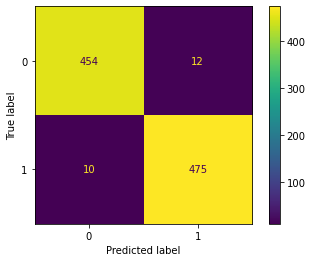

In [158]:
plot_confusion_matrix(randforest, xtest, ytest)  
plt.show()

In [159]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
RF_results = performance_evaluation(TP, TN, FP, FN)
RF_results
RF_results.get("Youden")

0.9536303703375957